[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/stmnk/qa/blob/master/data/dev_data_wrangling.ipynb)

# Dowload dataset

Download the training data in simplified format from Natural Questions [download](https://ai.google.com/research/NaturalQuestions/download) page. This step will require signing-in to a google account. 

## Extract dataset (simplified format)
Uncompress the training data in simplified format (unless already have).

In [201]:
import os.path
import gzip
import shutil

if os.path.isfile('v1.0-simplified_simplified-nq-train.jsonl.gz'):
    if os.path.isfile('v1.0-simplified_simplified-nq-train.jsonl'):
        print (".gz file already dowloaded and .jsonl data already decompressed: skipping extracting again")
    else:
        print ("Started extracting the .jsonl data ... (this may take a while ... please wait ...)")
        with gzip.open(f'v1.0-simplified_simplified-nq-train.jsonl.gz', 'rb') as f_in:
            with open(f'v1.0-simplified_simplified-nq-train.jsonl', 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
                print ("Finished extracting the .jsonl data")
else:
    print (".gz file does not exists: you have to dowload the data file first:")
    print ("https://ai.google.com/research/NaturalQuestions/download")

.gz file already dowloaded and .jsonl data already decompressed: skipping extracting again


## Read JSON line format
Read from a `.jsonl` file format (list of valid `json` one entry for each line, separated by `\n`).

In [2]:
import json

def read_jsonl(input_path) -> list:
    """
    Read list of objects from a JSON lines file.
    """
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            line_data = json.loads(line.rstrip('\n|\r'))
            data.append(line_data)
    print(f'Loaded {len(data)} records from {input_path}')
    return data

Load **all** simplified format training data (this can take a while ~17.5GB).

In [ ]:
nq_data = read_jsonl(f'v1.0-simplified_simplified-nq-train.jsonl')

## Load data into a (pandas) dataframe

In [4]:
import pandas as pd

In [241]:
nq_df = pd.DataFrame(nq_data)

In [243]:
nq_df

,document_text,long_answer_candidates,question_text,annotations,document_url,example_id
0,"Email marketing - Wikipedia <H1> Email marketing </H1> Jump to : navigation , search <Table> <Tr> <Td> </Td> <Td> ( hide ) This article has multiple issues . Please help improve it or discuss thes...","[{'start_token': 14, 'top_level': True, 'end_token': 170}, {'start_token': 15, 'top_level': False, 'end_token': 169}, {'start_token': 52, 'top_level': False, 'end_token': 103}, {'start_token': 53,...",which is the most common use of opt-in e-mail marketing,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 1952, 'candidate_index': 54, 'end_token': 2019}, 'short_answers': [{'start_token': 1960, 'end_token': 1969}], 'annotation_id': 59316545022...",https://en.wikipedia.org//w/index.php?title=Email_marketing&amp;oldid=814071202,5655493461695504401
1,"The Mother ( How I Met Your Mother ) - wikipedia <H1> The Mother ( How I Met Your Mother ) </H1> Jump to : navigation , search <Table> <Tr> <Th_colspan=""2""> Tracy McConnell </Th> </Tr> <Tr> <Td_co...","[{'start_token': 28, 'top_level': True, 'end_token': 212}, {'start_token': 29, 'top_level': False, 'end_token': 35}, {'start_token': 35, 'top_level': False, 'end_token': 45}, {'start_token': 45, '...",how i.met your mother who is the mother,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 212, 'candidate_index': 15, 'end_token': 310}, 'short_answers': [{'start_token': 213, 'end_token': 215}], 'annotation_id': 120348741537837...",https://en.wikipedia.org//w/index.php?title=The_Mother_(How_I_Met_Your_Mother)&amp;oldid=802354471,5328212470870865242
2,"Human fertilization - wikipedia <H1> Human fertilization </H1> Jump to : navigation , search <Table> <Tr> <Td> Part of a series on </Td> </Tr> <Tr> <Th> Human growth and development </Th> </Tr> <T...","[{'start_token': 14, 'top_level': True, 'end_token': 225}, {'start_token': 15, 'top_level': False, 'end_token': 24}, {'start_token': 24, 'top_level': False, 'end_token': 32}, {'start_token': 36, '...",what type of fertilisation takes place in humans,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 319, 'candidate_index': 24, 'end_token': 438}, 'short_answers': [], 'annotation_id': 10527123009892725162}]",https://en.wikipedia.org//w/index.php?title=Human_fertilization&amp;oldid=831042507,4435104480114867852
3,"List of National Football League career quarterback wins leaders - wikipedia <H1> List of National Football League career quarterback wins leaders </H1> Jump to : navigation , search <Table> <Tr> ...","[{'start_token': 28, 'top_level': True, 'end_token': 469}, {'start_token': 29, 'top_level': False, 'end_token': 35}, {'start_token': 35, 'top_level': False, 'end_token': 50}, {'start_token': 42, '...",who had the most wins in the nfl,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 509, 'candidate_index': 59, 'end_token': 576}, 'short_answers': [{'start_token': 512, 'end_token': 514}], 'annotation_id': 146347963651525...",https://en.wikipedia.org//w/index.php?title=List_of_National_Football_League_career_quarterback_wins_leaders&amp;oldid=818143757,5289242154789678439
4,"Roanoke Colony - wikipedia <H1> Roanoke Colony </H1> Jump to : navigation , search `` Lost Colony '' redirects here . For other uses , see Lost Colony ( disambiguation ) . <Table> <Tr> <Td> </Td> ...","[{'start_token': 32, 'top_level': True, 'end_token': 88}, {'start_token': 33, 'top_level': False, 'end_token': 87}, {'start_token': 88, 'top_level': True, 'end_token': 249}, {'start_token': 89, 't...",what happened to the lost settlement of roanoke,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1}, 'short_answers': [], 'annotation_id': 11038549994888625916}]",https://en.wikipedia.org//w/index.php?title=Roanoke_Colony&amp;oldid=843591647,5489863933082811018
...,...,...,...,...,...,...
307368,"The Price Is Right - wikipedia <H1> The Price Is Right </H1> Jump to : navigation , search This article is 

### Explore annotations structure
Explore the structure of the `anotations` list (contain all the information about the correct answer(s) to the question, if any).

In [203]:
df = pd.DataFrame(nq_data, 
                  columns=[
                    'question_text', # 'question_tokens', 
                    'document_text', # 'document_url', 'document_html', # 'document_tokens',
                    'annotations', # 'long_answer_candidates', 
                    'example_id', 
                  ]
                 ) 

In [204]:
pd.set_option('display.max_colwidth', 200)
df[['annotations']]

,annotations
0,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 1952, 'candidate_index': 54, 'end_token': 2019}, 'short_answers': [{'start_token': 1960, 'end_token': 1969}], 'annotation_id': 59316545022..."
1,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 212, 'candidate_index': 15, 'end_token': 310}, 'short_answers': [{'start_token': 213, 'end_token': 215}], 'annotation_id': 120348741537837..."
2,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 319, 'candidate_index': 24, 'end_token': 438}, 'short_answers': [], 'annotation_id': 10527123009892725162}]"
3,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 509, 'candidate_index': 59, 'end_token': 576}, 'short_answers': [{'start_token': 512, 'end_token': 514}], 'annotation_id': 146347963651525..."
4,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1}, 'short_answers': [], 'annotation_id': 11038549994888625916}]"
...,...
307368,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 218, 'candidate_index': 6, 'end_token': 321}, 'short_answers': [{'start_token': 293, 'end_token': 295}, {'start_token': 307, 'end_token': ..."
307369,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1}, 'short_answers': [], 'annotation_id': 4082814573060225469}]"
307370,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 173, 'candidate_index': 13, 'end_token': 265}, 'short_answers': [{'start_token': 174, 'end_token': 177}], 'annotation_id': 425351403563793..."
307371,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1}, 'short_answers': [], 'annotation_id': 1828800823834337985}]"


In [7]:
type(nq_data)

list

# Data Sampling
Setup some constants for ranging over the data.

In [137]:
data_size = len(nq_data)
data_range = range(data_size)

Count the number of questions with a singleton annotations list.

In [138]:
ann_count = 0

for i in data_range:
    l = nq_data[i]['annotations']
    if len(l) == 1:
        ann_count = ann_count + 1
        
print(ann_count)

307373


Count the number of unanswered questions (in `[2]` it is recommended to aggresively reduce the number of unanswered questions during training in order to improve learning performance).

In [139]:
no_long_ans_count = 0

for i in data_range:
    l = nq_data[i]['annotations'][0]
    if l['long_answer']['start_token'] == -1:
        no_long_ans_count = no_long_ans_count + 1
        
print(no_long_ans_count)    

155225


More than half are unanswered questions (this can also make the size of the data during development more manageable).

In [140]:
no_long_ans_count * 100 / ann_count

50.50053192700725

Split the data in two using the anotations. Extract queries with a non empty long answer anotation.

In [141]:
nq_data_answered = []

for i in data_range:
    l = nq_data[i]['annotations'][0]
    if l['long_answer']['start_token'] != -1:
        nq_data_answered.append(nq_data[i])
        
print(len(nq_data_answered))

152148


In [23]:
assert len(nq_data_answered) == ann_count - no_long_ans_count

Extract queries for which the anotators could not find an answer in the article (in the alocated time).

In [61]:
nq_data_no_l_ans = []

for i in data_range:
    l = nq_data[i]['annotations'][0]
    if l['long_answer']['end_token'] == -1:
        nq_data_no_l_ans.append(nq_data[i])
        
print(len(nq_data_no_l_ans))

155225


In [34]:
assert len(nq_data_no_l_ans) == no_long_ans_count

## Shrink unanswered sample size
Extract a sample of only `5%` of the unannotated (i.e. unanswered) data.

In [104]:
import random
five_p_no_ans = len(nq_data_no_l_ans) // 20 
nq_data_no_l_ans_5 = random.sample(nq_data_no_l_ans, five_p_no_ans)

In [105]:
assert len(nq_data_no_l_ans_5) == five_p_no_ans

Merge the 5% of no answer data sample back into the answered data subset.

In [103]:
nq_sampled_data = nq_data_answered + nq_data_no_l_ans_5
print(len(nq_sampled_data))

159909


Ensure the data is not partitioned by presence of annotations.

In [40]:
random.shuffle(nq_sampled_data)

In [102]:
print(len(nq_sampled_data))

159909


Write the newly sampled data to a `.jsonl` file.

In [42]:
def write_jsonl(data, output_path, append=False):
    """
    Write list of objects to a JSON lines file.
    """
    mode = 'a+' if append else 'w'
    with open(output_path, mode, encoding='utf-8') as f:
        for line in data:
            json_record = json.dumps(line, ensure_ascii=False)
            f.write(json_record + '\n')
    print(f'Wrote {len(data)} records to {output_path}')

In [43]:
write_jsonl(nq_sampled_data, 'nq_sampled_5p_no_ans.jsonl')

Wrote 159909 records to nq_sampled_5p_no_ans.jsonl


In [45]:
from pathlib import Path
Path('nq_sampled_10p_no_ans.jsonl').stat().st_size / 1024**3

8.91807780880481

Wrangled data size of the `.jsonl` uncompressed file is ~9.5GB. 

# EDA of questions by category 

In [93]:
data_size_5 = len(nq_sampled_data)
data_range_5 = range(data_size_5)

Set up constants for ranging over sampled data.

In [205]:
size_no_la = len(nq_data_no_l_ans_5)
size_no_la

7761

In [206]:
five_p_no_ans

7761

## Questions with no long and no boolean answer

In [133]:
nq_data_5_no_la_boolean = []

for i in data_range_5:
    l = nq_data[i]['annotations'][0]
    if l['long_answer']['end_token'] == -1:
        if l['yes_no_answer'] != 'NONE':
            nq_data_5_no_la_boolean.append(nq_data[i])

size_no_la_bool_a = len(nq_data_5_no_la_boolean)
print(size_no_la_bool_a)

0


## Questions with both long and boolean answer

In [207]:
nq_data_5_boolean = []

for i in data_range:
    l = nq_data[i]['annotations'][0]
    if l['long_answer']['end_token'] != -1:
        if l['yes_no_answer'] != 'NONE':
            nq_data_5_boolean.append(nq_data[i])

size_bool_a = len(nq_data_5_boolean)
print(size_bool_a)

3798


In [208]:
nq_data_5_boolean = []

for i in data_range:
    l = nq_data[i]['annotations'][0]
    if l['long_answer']['end_token'] != -1:
        if l['yes_no_answer'] == 'YES' or l['yes_no_answer'] == 'NO':
            nq_data_5_boolean.append(nq_data[i])

size_bool_a = len(nq_data_5_boolean)
print(size_bool_a)

3798


## Questions with long answer but neither boolean nor short answer

In [171]:
nq_data_5_la_no_sa_no_ba = []

for i in data_range_5:
    l = nq_sampled_data[i]['annotations'][0]
    if l['long_answer']['end_token'] != -1:
        if len(l['short_answers']) <= 0:
            if l['yes_no_answer'] == 'NONE':
                nq_data_5_la_no_sa_no_ba.append(nq_data[i])

size_la_no_sa_no_ba = len(nq_data_5_la_no_sa_no_ba)
print(size_la_no_sa_no_ba)

41424


## Questions with both long and short answers

In [172]:
nq_data_5_la_and_sa = []

for i in data_range_5:
    l = nq_sampled_data[i]['annotations'][0]
    if l['long_answer']['end_token'] != -1:
        if len(l['short_answers']) > 0:
            nq_data_5_la_and_sa.append(nq_data[i])

size_la_and_sa = len(nq_data_5_la_and_sa)
print(size_la_and_sa)

106926


## Question with a non-empty long answer

In [173]:
nq_data_5_la = []

for i in data_range_5:
    l = nq_sampled_data[i]['annotations'][0]
    if l['long_answer']['end_token'] != -1:
        nq_data_5_la.append(nq_data[i])

size_la = len(nq_data_5_la)
print(size_la)

152148


In [174]:
assert(size_la == size_la_and_sa + size_la_no_sa)

In [175]:
nq_data_5_no_la = []

for i in data_range_5:
    l = nq_sampled_data[i]['annotations'][0]
    if l['long_answer']['end_token'] == -1:
        nq_data_5_no_la.append(nq_data[i])

size_5_no_la = len(nq_data_5_no_la)
print(size_5_no_la)

7761


## Questions with both long and boolean answer (in sampled range)

In [210]:
nq_data_la_and_ba = []

for i in data_range_5:
    l = nq_sampled_data[i]['annotations'][0]
    if l['long_answer']['end_token'] != -1:
        if l['yes_no_answer'] != 'NONE':
            nq_data_la_and_ba.append(nq_data[i])

size_la_and_ba = len(nq_data_la_and_ba)
print(size_la_and_ba)

3798


In [211]:
assert(size_no_la == size_5_no_la)

## Final runthrough by question category

In [232]:
labels = 'Both Long and Short answers', 'Both Long and Boolean answers', 'Long but neither Short nor Boolean answers', 'No Long answer (neither short, nor boolean)'
sizes = [size_la_and_sa, size_la_and_ba, size_la_no_sa_no_ba, size_5_no_la]
sum(sizes)

159909

In [233]:
len(nq_sampled_data)

159909

In [234]:
assert(sum(sizes) == len(nq_sampled_data))

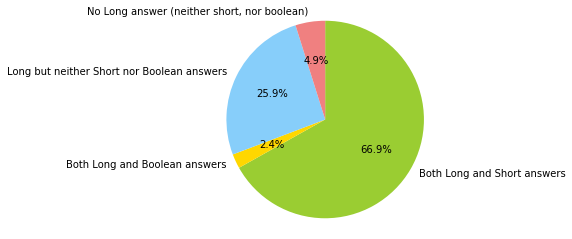

In [235]:
import matplotlib.pyplot as plt

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', 
        shadow=False, 
        startangle=90,
        counterclock=False
       )
plt.axis('equal')
plt.show()

In [236]:
eighty_p_la_and_sa_count = (len(nq_data_5_la_and_sa) // 10) * 8 
eighty_p_la_and_sa_5 = random.sample(nq_data_5_la_and_sa, eighty_p_la_and_sa_count)

final_data = eighty_p_la_and_sa_5 + nq_data_la_and_ba + nq_data_5_no_la + nq_data_5_la_no_sa_no_ba

random.shuffle(final_data)

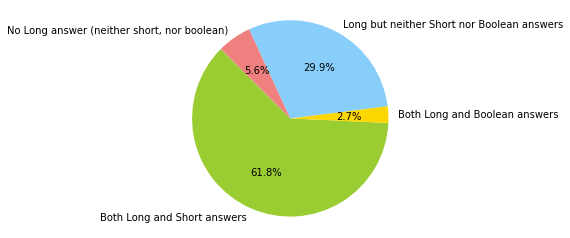

In [239]:
final_sizes = [eighty_p_la_and_sa_count, size_la_and_ba, size_la_no_sa_no_ba, size_5_no_la]

plt.pie(final_sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', 
        shadow=False, startangle=135
       )
plt.axis('equal')
plt.show()

In [192]:
write_jsonl(final_data, 'final_data.jsonl')

Wrote 138519 records to final_data.jsonl


In [193]:
Path('final_data.jsonl').stat().st_size / 1024**3

7.271546839736402

In [195]:
instances = len(final_data)
instances

138519

In [199]:
not_answered = int(5.6 * instances / 100)
only_long = int(29.9 * instances / 100)
boolean = int(2.7 * instances / 100)
short = int(61.8 * instances / 100)
print(not_answered, only_long, boolean, short)

7757 41417 3740 85604


To sum up: the final data is a `.jsonl` file of about 8GB in size with a total of about 140K instances. There are about 8K questions with no answer at all, 42K that only have a long answer but no boolean or short answer, about 4K questions have both a long answer and a yes/no answer, and about 90K questions have both a paragraph long answer and a span-size short answer.

# Create minisized dev data file(s)

In [ ]:
# head -1 data/mini/nq_sampled_10p_no_ans.jsonl > data/mini/nq_sampled_10p_no_ans_01.jsonl
# head -10 data/mini/nq_sampled_10p_no_ans.jsonl > data/mini/nq_sampled_10p_no_ans_10.jsonl
# head -100 data/mini/nq_sampled_10p_no_ans.jsonl > data/mini/nq_sampled_10p_no_ans_100.jsonl
# head -1000 data/mini/nq_sampled_10p_no_ans.jsonl > data/mini/nq_sampled_10p_no_ans_1000.jsonl
# cd simplified
# head -15000 nq_sampled_10p_no_ans.jsonl > ../mini/nq_sampled_10p_no_ans_15K.jsonl
# tail -25000 nq_sampled_10p_no_ans.jsonl > ../mini/nq_sampled_10p_no_ans_25K.jsonl

# EDA by type of questions

In [ ]:
# head -10 final_data.jsonl > final_data_10.jsonl
# TODO: group by question types: who/which/when/where/how/all/list(of)/etc.

In [242]:
nq_data = read_jsonl(f'final_data.jsonl')
nq_df = pd.DataFrame(nq_data)

Loaded 138519 records from final_data.jsonl


In [6]:
qa_data = read_jsonl(f'final_data_10.jsonl')
qa_df = pd.DataFrame(qa_data)

Loaded 10 records from final_data_10.jsonl


In [10]:
pd.set_option('display.max_colwidth', 200)
qa_df[['annotations']]

,annotations
0,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1}, 'short_answers': [], 'annotation_id': 17144205730399169735}]"
1,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 115, 'candidate_index': 6, 'end_token': 136}, 'short_answers': [{'start_token': 126, 'end_token': 134}], 'annotation_id': 1043754834004502..."
2,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1}, 'short_answers': [], 'annotation_id': 14788766791369217939}]"
3,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 683, 'candidate_index': 22, 'end_token': 822}, 'short_answers': [{'start_token': 785, 'end_token': 788}], 'annotation_id': 140813905137883..."
4,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1}, 'short_answers': [], 'annotation_id': 4288498609737821584}]"
5,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1}, 'short_answers': [], 'annotation_id': 12613195174997804504}]"
6,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 181, 'candidate_index': 5, 'end_token': 6848}, 'short_answers': [], 'annotation_id': 15553322195512004649}]"
7,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1}, 'short_answers': [], 'annotation_id': 16808554699638739768}]"
8,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 6332, 'candidate_index': 54, 'end_token': 7290}, 'short_answers': [], 'annotation_id': 12097927264298560903}]"
9,"[{'yes_no_answer': 'NONE', 'long_answer': {'start_token': 55, 'candidate_index': 0, 'end_token': 85}, 'short_answers': [{'start_token': 75, 'end_token': 76}], 'annotation_id': 5870482147346936469}]"


In [9]:
from pandas.io.json import json_normalize

nq_out = pd.DataFrame()

for i in qa_data:
  line_norm = json_normalize(i['annotations'])
  nq_out = pd.concat([nq_out, line_norm])

nq_out

,yes_no_answer,short_answers,annotation_id,long_answer.start_token,long_answer.candidate_index,long_answer.end_token
0,NONE,[],1.714421e+19,-1,-1,-1
0,NONE,"[{'start_token': 126, 'end_token': 134}]",1.043755e+19,115,6,136
0,NONE,[],1.478877e+19,-1,-1,-1
0,NONE,"[{'start_token': 785, 'end_token': 788}]",1.408139e+19,683,22,822
0,NONE,[],4.288499e+18,-1,-1,-1
0,NONE,[],1.261320e+19,-1,-1,-1
0,NONE,[],1.555332e+19,181,5,6848
0,NONE,[],1.680855e+19,-1,-1,-1
0,NONE,[],1.209793e+19,6332,54,7290
0,NONE,"[{'start_token': 75, 'end_token': 76}]",5.870482e+18,55,0,85


# EDA by type of answers

In [ ]:
# TODO: group by answer types: paragraph/table/list/etc.